Phase transition diagrams of the Basis Pursuit algorithm for various random matrices with different "concentration properties"
===================================

$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\E}{\mathbb{E}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$



This notebook provides empirical evidences to the theoretical results from 

>"On the gap between RIP-properties and sparse recovery conditions" Sjoerd Dirksen, Guillaume Lecué, Holger Rauhut

available at http://arxiv.org/abs/1504.05073

In [1]:
from __future__ import division
import numpy as np
%pylab inline
#%load_ext autoreload
#%autoreload 2

Populating the interactive namespace from numpy and matplotlib


Compressed Sensing Recovery with the Douglas-Rachford algorithm
------------------------------------
In Compressed sensing, one is given a highly underdetermined linear system with $m$ equations and $n$ unknown variables with $n>>m$: find $\hat x$ such that  $y=A \hat x$ where $A\in\R^{m\times n}$ is a compression matrix, i.e. $n>m$. This problem is ill posed because $\hat x$ is higher dimensional than $y$ and so there is an infinite number of solutions. What saves the day is that the target vector $\hat x$ we want to recover is sparse in the sense that it has a short support.

A natural idea is therefore to look for the vector with the shortest support in the space of solutions but this problem is usually NP-hard because the function "size of the support" of a vector is not convex. So one may look for the convex function the "closest" to the last one, which is here the $\ell_1$-norm. So we end up with a procedure that aims to find the solution with the smallest $\ell_1$ norm:
$$ x_{recovered} \in \arg\min_{x\in\R^n} \norm{x}_1 \quad\mbox{s.t.}\quad Ax=y$$
where the $\ell^1$ norm is defined as
$$ \norm{x}_1 = \sum_{j=1}^n \abs{x_j}. $$
This procedure is called the **basis pursuit**.


It is a convex optimization problem of a non-smooth function under affine
constraints. This can be shown to be equivalent to a linear programming
problem, for wich various algorithms can be used (simplex, interior
points). We propose here to use the Douglas-Rachford algorithm.

Douglas-Rachford Algorithm
--------------------------
The Douglas-Rachford (DR) algorithm is an iterative scheme designed to solve convex optimization of the form
$$ \umin{x} f(x) + g(x) $$
where $f$ and $g$ are convex functions, of which one is able to
compute the proximal operators.

We recall that the proximal operator of a function $h$ is defined by
$$\mathrm{prox}_{h}(x) \in {\rm argmin}_{u\in\R^N}\Big(\frac{1}{2}\norm{x-u}_2^2+h(u)\Big)$$

The Douglas-Rachford algorithm takes an arbitrary initialization element $s^{(0)}$, a parameter $\ga>0$ and iterates, for $k=1,2,\ldots$

$$
\left|\begin{array}{l}
x^{(k)} = \mathrm{prox}_{\gamma f} (s^{(k-1)} )\\
z^{(k)} = \text{prox}_{\ga g}( 2x^{(k)}-s^{(k-1)})\\
s^{(k)} = s^{(k-1)}+ z^{(k)}-x^{(k)}.
\end{array}\right.
$$

It is of course possible to inter-change the roles of $f$ and $g$,
which defines a different algorithm.

The iterates $x^{(k)}$ converge to a solution of the minimization problem $\min f+g$.

Implementation of the Basis Pursuit via the Douglas-Rachford algorithm
---------------------------------
It is possible to recast the basis pursuit procedure as the minimization of a sum $f+g$
where $g(x) = \norm{x}_1$ and $f(x)=\iota_{\Omega}$ where $\Omega =
\enscond{x}{Ax=y}$ is an affine space, and $\iota_\Omega$ is the indicator
function
$$ \iota_\Omega(x) = \choice{ 0 \qifq x \in \Omega, \\ +\infty \qifq x \notin \Omega. } $$


The proximal operator of the $\ell^1$ norm is a soft thresholding operator:
$$ \text{prox}_{\gamma \norm{\cdot}_1}(x)_j = \max\pa{ 0, 1-\frac{\ga}{\abs{x_j}} } x_j, \quad j=1,\ldots,n $$

# Phase transition diagrams
A phase transition diagram is a usefull (simulation) tool to answer the following question:

> Given a compression matrix $A$ of size $m\times n$ and a reconstrcution algorithm (for instance the Basis Pursuit) what is the maximal sparsity parameter $s$ such that every $s$-sparse signal $\hat x\in\R^n$ can be exactly reconstructed from $y=A\hat x$ (and $A$) using the algorithm?

To answer this question, we iterate over $s=1,2,\cdots,m$ (no need to go beyond $m$) and for each $s$ we simulate *nbtest* signals $\hat x$ with sparsity $s$, run the reconstruction algorithm with $y=A\hat x$ and check if the reconstruction is exact (that is $||x_{restored} - \hat x||_2\leq 0.001$. If the reconstruction is exact for the *nbtest* signals then we plot a white pixel if reconstruction failed for all *nbtest* signals then we plot a black pixel. For every result inbetween we plot a grey pixel. (in what follows, we use colour red in place of the white colour and colour blue in place of black colour).

This gives a line of the diagram matrix for a given number of measurements $m$. Then, we repeat this construction for all $m=1,2,\ldots,n$. 

We end up with a $m\times n$ matrix and use some heatmap representation to draw the phase transition diagram. (Actually, we stop at $s\leq n/2$ since the proportional case $s\sim m \sim n$ is not very interesting in Compressed sensing (even though this regime, sometimes called the "Kashin regime", has been extensively studied in the theory of Banach spaces since Dvoretsky theorem).

### Douglas-Rachford procedure

In [2]:
#proximal operator of \ell_1 norm
def prox_gamma_g(x, gamma):
    return x - x/maximum(abs(x)/gamma,1) # soft-thresholding

#proximal operator of the indicator function of an affine space 
def prox_f(x, y, A, pA):
    return x + pA.dot(y-A.dot(x))

def DR(n, y, A, pA, nbiter, gamma):
    s = zeros(n)
    for iter in range(nbiter):  # iter goes from 0 to nbiter-1
        x = prox_f(s, y, A, pA)
        z = prox_gamma_g(2*x-s, gamma)
        s = s + z - x
    return x

### Phase transition matrix

In [3]:
#initialization of the seed for reproducibility
random.seed(0)

In [4]:
def signal(n, sparsity):
    sel = random.permutation(n)
    sel = sel[0:sparsity]   # indices of the nonzero elements of xsharp
    xsharp = zeros(n)
    xsharp[sel] = 1
    return xsharp

In [5]:
def phase_transition_mat(N, nbiter, gamma, nbtest):
    """return a N.N matrix with the number of reconstruction success for every  1\leq P \leq N measurements 
    and sparsity 1\leq S\leq N
    N : ambiant dimension of the signals
    nbiter : number of iteration in the DR algorithm
    gamma : threshold parameter in the soft threshold proximal function
    nbtest : number of tests for each pixel"""
    PTM = zeros((N,int(N/2)))
    set_ind_failure = []
    for P in range(1,N+1):#construct one line of the Phase transition matrix for a given number of measurements P
        if (P % 20) == 0:
            print("line number {} done".format(P))
        A = randn(P,N) / sqrt(P)
        pA = pinv(A) # pseudo-inverse. Equivalent to pA = A.T.dot(inv(A.dot(A.T)))
        ind_failure = 0
        for sparsity in range(1,min(P, int(N/2))+1):
            nb_success = 0         
            for i in range(nbtest):
                xsharp = signal(N, sparsity)
                y = A.dot(xsharp)
                x_restored = DR(N, y, A, pA, nbiter, gamma)
                if norm(x_restored-xsharp, ord=2) <0.001:
                    nb_success = nb_success + 1
            PTM[P-1, sparsity-1] = nb_success
    return PTM

### construction of the Phase transition matrix

> N: the size of the ambiant space

> nbiter: the number of iteration in the Douglas Rachford algorithm

> gamma: theshold parameter in the soft thresholding operator

> nbtest: number of test (=number of signals) constructed for each pixel

In [6]:
N, nbiter, gamma, nbtest = 30, 20, 1, 10
mat = phase_transition_mat(N, nbiter, gamma, nbtest)# construction of the matrix with the number of success among nbtest

line number 20 done


### construction of the 'frontier'

In [7]:
def frontier(mat):
    """construction of the phase transition frontier, i.e. first time the number of success goes below nbtest/2"""
    L = []
    N = len(mat)
    for s in range(int(N/2)):
        P = 0
        while mat[P,s]<nbtest/2 and P<N-1:
            P = P + 1
        L.append(P)
    return L

### draw a heatmap of the phase transition matrix together with the frontier

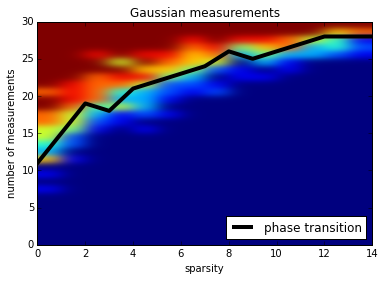

In [9]:
P_min, P_max, S_min, S_max = 0, N, 0, int(N/2)-1
fig = plt.imshow(mat[P_min:P_max, S_min:S_max], interpolation="gaussian",  
                 aspect='auto', origin = 'lower', extent=[S_min, S_max, P_min, P_max])
titre = "Gaussian measurements"
plt.title(titre)
plt.xlabel('sparsity')
plt.ylabel('number of measurements')

#empirical phase transition
X = range(int(N/2))
L = frontier(mat)
plot(X,L, linewidth=4, color = 'black', label='phase transition')
plt.legend(loc=4)
#Theoretical phase transition curve
#Y = [3*s*log(0.6*N/(s+1)) for s in X]
#plot(X,Y, linewidth=3, color = 'white')

#plt.savefig("gaussian_100.png",bbox_inches='tight')

### repeat the construction of the frontier a hundred times to "smooth it"

> nb_curves: number of phase transition curves constructed. Those curves are then averaged in order to "smooth" the efeect of randomness and get a "stable" phase transition

In [18]:
N, nbiter, gamma, nbtest, nb_curves = 30, 20, 1, 10, 20
L = zeros(int(N/2))
for i in range(nb_curves):
    if (i % 10) == 0:
        print('step {} done'.format(i))
    mat = phase_transition_mat(N, nbiter, gamma, nbtest)
    F = frontier(mat)
    L = [sum(a) for a in zip(L,F)] 
L_gauss = [i/nb_curves for i in L]

step 0 done
line number 20 done
line number 20 done
line number 20 done
line number 20 done
line number 20 done
line number 20 done
line number 20 done
line number 20 done
line number 20 done
line number 20 done
step 10 done
line number 20 done
line number 20 done
line number 20 done
line number 20 done
line number 20 done
line number 20 done
line number 20 done
line number 20 done
line number 20 done
line number 20 done


In [310]:
#For next use, save the Gaussian phase transition frontier in the gaussian.txt file
filename = 'gaussian_phase_transition_{}.txt'.format(N)
with open(filename, "w") as f:
    for item in L:
        f.write('{}\n'.format(item))
f.close()

In [19]:
#import the phase transition from the file 'gaussian_phase_transition.txt'
import csv
N = 100
filename = 'gaussian_phase_transition_{}.txt'.format(N)
with open(filename, "r") as inputfile:
    L_gauss = list(csv.reader(inputfile))
L_gauss = [int(float(ele[0])) for ele in L_gauss]

### Draw the phase transition frontier for Gaussian measurements

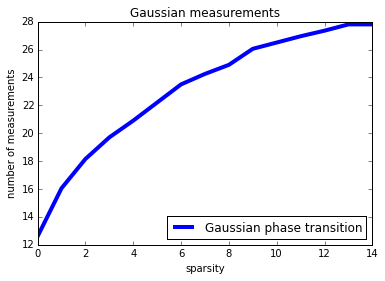

In [19]:
X = range(len(L_gauss))
plot(X,L_gauss, linewidth=4, color = 'blue', label="Gaussian phase transition")
titre = "Gaussian measurements"
plt.title(titre)
plt.xlabel('sparsity')
plt.ylabel('number of measurements')
plt.legend(loc=4)
#plt.savefig("phase_transition_curve_gaussian_100.png",bbox_inches='tight')

# Construction of (smoothed) phase transition frontiers for other type of measurements

In the two papers (available at http://lecueguillaume.github.io/research/)
> S. Dirksen, G. Lecué and H. Rauhut.
*On the gap between RIP-properties and sparse recovery conditions*

>G. Lecué and S. Mendelson.
*Sparse recovery under weak moment assumptions*

we proved that reconstruction properties (stability and robustness) of the basis pursuit algorithm goes far beyond Gaussian measurements. For instance, random matrices with i.i.d. components having only $\log N$ gaussian moments have the same "reconstruction properties" has the Gaussian one ($N$ is the size of the signals). 

The aim of this notebook is to highlight this "universality phenomenum".

### Random measurements matrices with $\psi_\alpha$ coordinates for $0<\alpha\leq2$

We construct matrices with i.i.d. coordinates with exponential moments. Note that if $g$ is a standard Gaussian variable then $ {\rm sign}(g) |g|^{2/\alpha}$ is exactly a $\psi_\alpha$ random variable (with mean zero).

In [10]:
def mat_exp_power(P, N, alpha):
    A = randn(P,N)/ sqrt(P)
    return np.multiply(np.power(A,int(2/alpha)), sign(A))

In [11]:
def phase_transition_mat_exp_power(N, nbiter, gamma, nbtest, alpha):
    PTM = zeros((N,int(N/2)))
    set_ind_failure = []
    for P in range(20,N+1):#construct one line of the Phase transition matrix for a given number of measurements P
        A = mat_exp_power(P,N, alpha) 
        pA = pinv(A) # pseudo-inverse. Equivalent to pA = A.T.dot(inv(A.dot(A.T)))
        ind_failure = 0
        for sparsity in range(1,min(P, int(N/2))+1):
            nb_success = 0         
            for i in range(nbtest):
                xsharp = signal(N, sparsity)
                y = A.dot(xsharp)
                x_restored = DR(N, y, A, pA, nbiter, gamma)
                if norm(x_restored-xsharp, ord=2) <0.001:
                    nb_success = nb_success + 1
            PTM[P-1, sparsity-1] = nb_success
    return PTM

In [14]:
N, nbiter, gamma, nbtest, alpha = 40, 20, 1, 10, 1
mat = phase_transition_mat_exp_power(N, nbiter, gamma, nbtest, alpha)

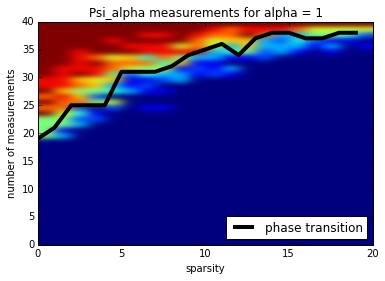

In [15]:
P_min, P_max, S_min, S_max = 0, N, 0, int(N/2)
fig = plt.imshow(mat[P_min:P_max, S_min:S_max], interpolation="gaussian",  
                 aspect='auto', origin = 'lower', extent=[S_min, S_max, P_min, P_max])
titre = "Psi_alpha measurements for alpha = {}".format(alpha)
plt.title(titre)
plt.xlabel('sparsity')
plt.ylabel('number of measurements')

#empirical phase transition
X = range(int(N/2))
L = frontier(mat)
plot(X,L, linewidth=4, color = 'black', label='phase transition')
plt.legend(loc=4)
filename = "exp_power_{}_{}.png".format(alpha, N)
plt.savefig(filename,bbox_inches='tight')

In [13]:
N, nbiter, gamma, nbtest, nb_curves = 100, 20, 1, 16, 30
L = zeros(int(N/2))
dict_exp_power = {2: L, 1.8: L, 1.5: L, 1.2: L, 1: L, 0.8: L, 0.5: L, 0.1: L, 0.05: L, 0.01: L}
for alpha in dict_exp_power.keys():
    print("power {} running".format(alpha))
    for i in range(nb_curves):            
        mat = phase_transition_mat_exp_power(N, nbiter, gamma, nbtest, alpha)
        F = frontier(mat)
        dict_exp_power[alpha] = [sum(a) for a in zip(dict_exp_power[alpha], F)] 
    dict_exp_power[alpha] = [ele/nb_curves for ele in dict_exp_power[alpha]]

power 1.5 running
power 1 running
power 2 running
power 1.8 running
power 0.1 running
power 0.8 running
power 1.2 running
power 0.05 running
power 0.01 running
power 0.5 running


In [6]:
#save the dictionary of phase transitions curves for later use
import pickle
#with open('dictionnaries_exp_power_100_v3.p', 'wb') as fp:
#    pickle.dump(dict_exp_power, fp)
    
#to load the dictionary
N, nbiter, gamma, nbtest, nb_curves = 100, 20, 1, 16, 30
with open('dictionnaries_exp_power_100_v3.p', 'rb') as fp:
    dict_exp_power = pickle.load(fp)

In [7]:
a = [1, 3, 2]
sort(a)

array([1, 2, 3])

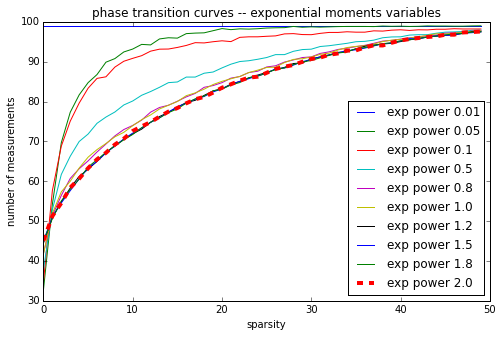

In [9]:
#N = 100
plt.figure(figsize=(8,5))
X = range(int(N/2))
for key in sort(dict_exp_power.keys()):
    L = dict_exp_power[key]
    text = 'exp power {}'.format(key)
    if key == 2:
        plot(X, L, 'r--', label = text, linewidth=4)
    else:
        plot(X, L, label = text)
plt.legend(loc=4)
plt.xlabel('sparsity')
plt.ylabel('number of measurements')
plt.title('phase transition curves -- exponential moments variables')
#plot(X,L_gauss, linewidth=3, color = 'blue', label="Gaussian phase transition")
plt.legend(loc=4)
plt.savefig("phase_transition_curves_exp_power_100_v3.png",bbox_inches='tight')

### Random measurements matrices with coordinates in $L_p$
For this example, we construct $P\times N$ i.i.d. Student variables with $k$ degrees of liberty. It has $p$ moments if and only if $k>p$.

In [26]:
def mat_power(P,N, p):
    return random.standard_t(p, size=(P,N))

In [27]:
def phase_transition_mat_power(N, nbiter, gamma, nbtest, p):
    PTM = zeros((N,int(N/2)))
    set_ind_failure = []
    for P in range(1,N+1):#construct one line of the Phase transition matrix for a given number of measurements P
        A = mat_power(P,N, p) 
        pA = pinv(A) # pseudo-inverse. Equivalent to pA = A.T.dot(inv(A.dot(A.T)))
        ind_failure = 0
        for sparsity in range(1,min(P, int(N/2))+1):
            nb_success = 0         
            for i in range(nbtest):
                xsharp = signal(N, sparsity)
                y = A.dot(xsharp)
                x_restored = DR(N, y, A, pA, nbiter, gamma)
                if norm(x_restored-xsharp, ord=2) <0.001:
                    nb_success = nb_success + 1
            PTM[P-1, sparsity-1] = nb_success
    return PTM

In [28]:
N, nbiter, gamma, nbtest, nb_curves = 30, 20, 1, 10, 20
L = zeros(int(N/2))
dict_power = {30: L, 20: L, 15: L, 10: L, 5: L, 4: L, 3: L, 2: L}
for p in dict_power.keys():
    print('power {} running'.format(p))
    for i in range(nb_curves):
        mat = phase_transition_mat_power(N, nbiter, gamma, nbtest, p)
        F = frontier(mat)
        dict_power[p] = [sum(a) for a in zip(dict_power[p], F)] 
    dict_power[p] = [ele/nb_curves for ele in dict_power[p]]

power 2 running
power 3 running
power 20 running
power 5 running
power 4 running
power 10 running
power 30 running
power 15 running


In [16]:
#save the dictionary of phase transitions curves to speed up later investigation
import pickle
#with open('dictionnaries_power_100.p', 'wb') as fp:
#    pickle.dump(dict_power, fp)

#To load the dictionary
with open('dictionnaries_power_100.p', 'rb') as fp:
    dict_power = pickle.load(fp)

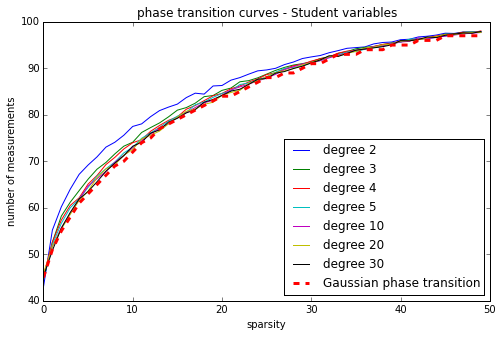

In [25]:
X = range(int(N/2))
plt.figure(figsize=(8,5))
for key in dict_power.keys():
    if key != 15:
        L = dict_power[key]
        text = 'degree {}'.format(key)
        plot(X, L, label = text)
plt.xlabel('sparsity')
plt.ylabel('number of measurements')
plt.title('phase transition curves - Student variables')
#Gaussian phase transition
plot(X,L_gauss, 'r--', linewidth=3, label="Gaussian phase transition")
plt.legend(loc=4)
plt.savefig("phase_transition_curves_student_100.png",bbox_inches='tight')

### Theoretical guarentee on phase transition

Asymptotically when $N\to\infty$, existence of a phase transition, which is roughtly $$ P \geq 2e S \log\Big(\frac{N}{\sqrt{\pi}S}\Big)\approx 5.4 S \log\Big(\frac{0.6 N}{S}\Big)$$  has been proved in several papers:
>D. L. Donoho. *High-dimensional centrally symmetric polytopes with neighborliness proportional to dimension.* Discrete and Computational Geometry, 35(4):617–652, 2006.

> D. L. Donoho and J. Tanner. *Neighborliness of randomly projected simplices in high dimensions.* Proceedings of the National Academy of Sciences of the United States of America, 102(27):9452–9457, 2005.

> D. L. Donoho and J. Tanner. *Counting faces of randomly projected polytopes when the projection radically lowers dimension.* Journal of the American Mathematical Society, 22(1):1–53, 2009.

>D. L. Donoho and J. Tanner. *Observed universality of phase transitions in high-dimensional geometry, with implications for modern data analysis and signal processing*. Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences, 367(1906):4273–4293, 2009.

> S. Oymak and J. A. Tropp. *Universality laws for randomized dimension reduction, with applications*
